# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import *

# Parameters

In [13]:
fig_dir = 'data/figure'
exp_name = 'compare_extra_ratio'
time_path = 'data/time/compare_extra_ratio_2020_12_12_1_4_0.npy'
cost_path = 'data/cost/compare_extra_ratio_2020_12_12_1_4_0.npy'
methods = ['greedy', 'approx', 'approx_woc']
sizes = np.linspace(0, 1, num=11)
repeats = len(sizes)

# Load data

In [14]:
%%time
run_time = np.load(time_path)
travel_cost = np.load(cost_path)
print(run_time.shape, travel_cost.shape)

(33,) (33,)
Wall time: 7.98 ms


# Convert to DataFrame

In [15]:
df_time = pd.DataFrame(run_time.reshape(repeats,-1)/np.power(10,6), columns=methods)
df_time.loc[:, 'size'] = sizes
print(df_time.shape)
print(df_time.info())
display(df_time)

(11, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      11 non-null     float64
 1   approx      11 non-null     float64
 2   approx_woc  11 non-null     float64
 3   size        11 non-null     float64
dtypes: float64(4)
memory usage: 480.0 bytes
None


,greedy,approx,approx_woc,size
0,0.0000,0.488741,0.029040,0.0
1,0.0001,0.502151,0.038065,0.1
2,0.0000,0.518319,0.041919,0.2
3,0.0001,0.506253,0.058229,0.3
4,0.0000,0.531262,0.056376,0.4
5,0.0001,0.555429,0.069125,0.5
6,0.0000,0.556430,0.070010,0.6
7,0.0000,0.539316,0.076319,0.7
8,0.0000,0.580117,0.081273,0.8
9,0.0000,0.571307,0.083742,0.9


In [16]:
df_cost =  pd.DataFrame(travel_cost.reshape(repeats,-1), columns=methods)
df_cost.loc[:, 'size'] = sizes
print(df_cost.shape)
print(df_cost.info())
display(df_cost)

(11, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      11 non-null     float64
 1   approx      11 non-null     float64
 2   approx_woc  11 non-null     float64
 3   size        11 non-null     float64
dtypes: float64(4)
memory usage: 480.0 bytes
None


,greedy,approx,approx_woc,size
0,10733.1,10009.5,9987.6,0.0
1,10733.1,9552.3,9497.2,0.1
2,10733.1,9386.2,9414.4,0.2
3,10733.1,9243.3,9352.6,0.3
4,10733.1,9229.1,9350.0,0.4
5,10733.1,9215.2,9346.7,0.5
6,10733.1,9206.3,9342.0,0.6
7,10733.1,9202.3,9342.0,0.7
8,10733.1,9202.3,9342.0,0.8
9,10733.1,9197.8,9337.5,0.9


# Calculate metrics 

## Processing time

In [17]:
df_time.mean()

greedy        0.000027
approx        0.538769
approx_woc    0.062786
size          0.500000
dtype: float64

## Ride-sharing efficiency

In [18]:
df_cost.loc[:, 'approx_gain'] = df_cost['greedy']/df_cost['approx']
df_cost.loc[:, 'approx_woc_gain'] = df_cost['greedy']/df_cost['approx_woc']
display(df_cost)

,greedy,approx,approx_woc,size,approx_gain,approx_woc_gain
0,10733.1,10009.5,9987.6,0.0,1.072291,1.074643
1,10733.1,9552.3,9497.2,0.1,1.123614,1.130133
2,10733.1,9386.2,9414.4,0.2,1.143498,1.140073
3,10733.1,9243.3,9352.6,0.3,1.161176,1.147606
4,10733.1,9229.1,9350.0,0.4,1.162963,1.147925
5,10733.1,9215.2,9346.7,0.5,1.164717,1.148330
6,10733.1,9206.3,9342.0,0.6,1.165843,1.148908
7,10733.1,9202.3,9342.0,0.7,1.166350,1.148908
8,10733.1,9202.3,9342.0,0.8,1.166350,1.148908
9,10733.1,9197.8,9337.5,0.9,1.166920,1.149462


In [19]:
df_cost[['approx_gain', 'approx_woc_gain']].mean()

approx_gain        1.150968
approx_woc_gain    1.139487
dtype: float64

In [20]:
df_cost[['greedy', 'approx', 'approx_woc']].mean()

greedy        10733.100000
approx         9331.100000
approx_woc     9422.681818
dtype: float64

# Plots

## Processing time

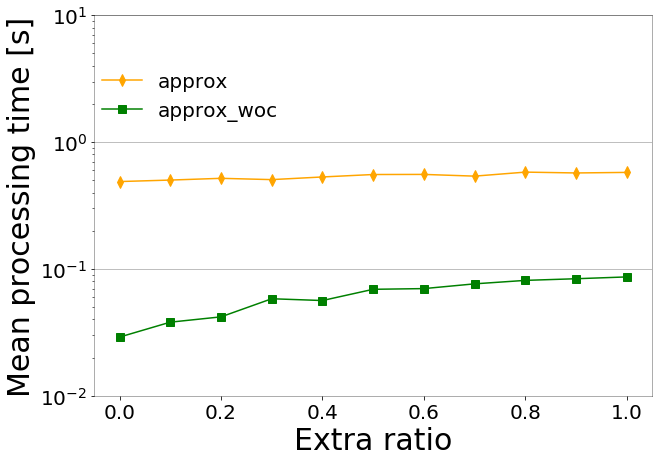

In [21]:
plot_proc_time(
    df_time, 
    sizes, 
    exp_name, 
    ylim=(10**-2, 10**1), 
    xlabel='Extra ratio',
    legend_loc=(0, 0.7)
)

## Travel cost

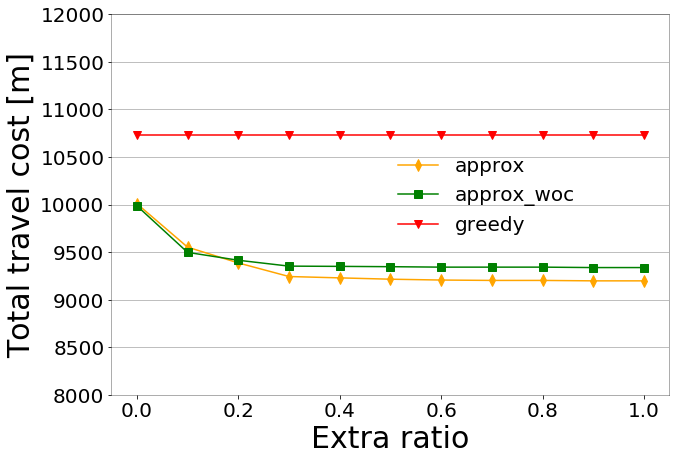

In [22]:
plot_travel_cost(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(8000,12000), 
    xlabel='Extra ratio',
    legend_loc=(0.5, 0.4)
)

## Ride-sharing efficiency

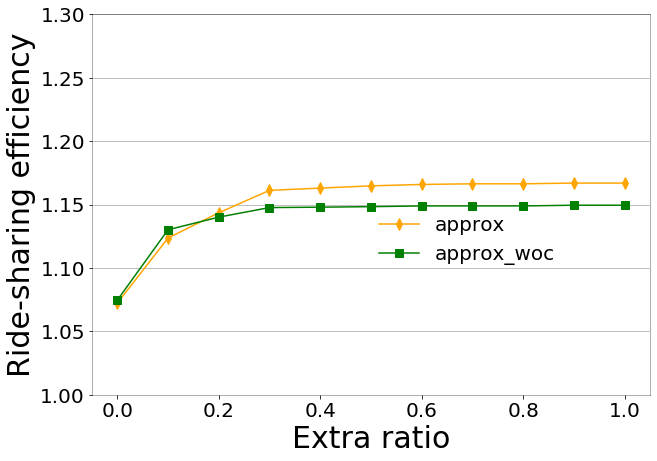

In [23]:
plot_rs_efficiency(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(1.0,1.3), 
    xlabel='Extra ratio',
    legend_loc=(0.5, 0.32)
)